## The Survival Classification of Titanic Dataset Using Classifiers

In [1]:
# Data mining and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot appears in jupyter
%matplotlib inline

# Training model
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.naive_bayes import GaussianNB # Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.svm import SVC # Supper vector machine

# Evaluation
from sklearn.model_selection import train_test_split # 拆分 train set 及 test set
from sklearn.model_selection import GridSearchCV # tuning hyperparameters
from sklearn.metrics import confusion_matrix, classification_report # evaluation
from sklearn.metrics import precision_score, recall_score, f1_score # evaluation
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay # visualization

In [2]:
# Load the titanic dataset
df = pd.read_csv('./titanic.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312
row.names,1,2,3,4,5,6,7,8,9,10,...,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313
pclass,1st,1st,1st,1st,1st,1st,1st,1st,1st,1st,...,3rd,3rd,3rd,3rd,3rd,3rd,3rd,3rd,3rd,3rd
survived,1,0,0,0,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
name,"Allen, Miss Elisabeth Walton","Allison, Miss Helen Loraine","Allison, Mr Hudson Joshua Creighton","Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)","Allison, Master Hudson Trevor","Anderson, Mr Harry","Andrews, Miss Kornelia Theodosia","Andrews, Mr Thomas, jr","Appleton, Mrs Edward Dale (Charlotte Lamson)","Artagaveytia, Mr Ramon",...,"Yasbeck, Mr Antoni","Yasbeck, Mrs Antoni","Youssef, Mr Gerios","Zabour, Miss Hileni","Zabour, Miss Tamini","Zakarian, Mr Artun","Zakarian, Mr Maprieder","Zenn, Mr Philip","Zievens, Rene","Zimmerman, Leo"
age,29.0,2.0,30.0,25.0,0.9167,47.0,63.0,39.0,58.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Cherbourg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home.dest,"St Louis, MO","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON","New York, NY","Hudson, NY","Belfast, NI","Bayside, Queens, NY","Montevideo, Uruguay",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room,B-5,C26,C26,C26,C22,E-12,D-7,A-36,C-101,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ticket,24160 L221,NaN,NaN,NaN,NaN,NaN,13502 L77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boat,2,NaN,(135),NaN,11,3,10,NaN,2,(22),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check th information**

In [3]:
# Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [4]:
df.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


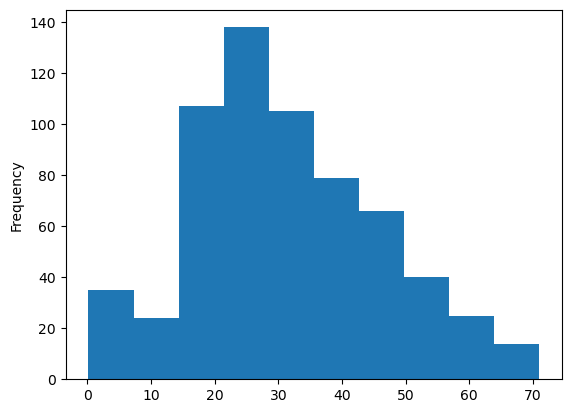

In [5]:
# Check the age distribution
df['age'].plot.hist();

In [6]:
# Check the NaN
df.isna().sum()

row.names       0
pclass          0
survived        0
name            0
age           680
embarked      492
home.dest     559
room         1236
ticket       1244
boat          966
sex             0
dtype: int64

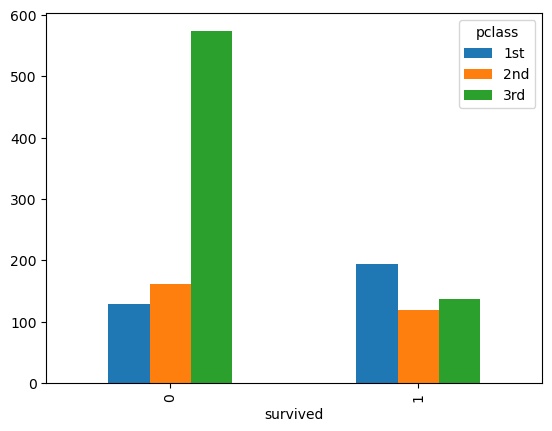

In [7]:
# Check the relationship between 'survived' and 'pclass' -> whether the survive rate can be atrributed to pclass?
pd.crosstab(df['survived'], df['pclass']).plot.bar();

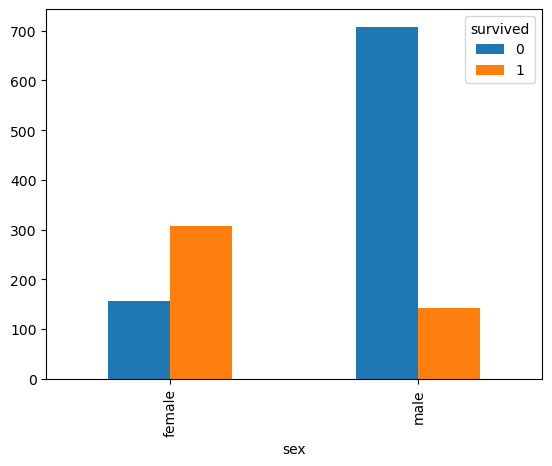

In [8]:
# Check the relationship between 'survived' and 'sex' -> whether the survive rate can be atrributed to sex?
pd.crosstab(df['sex'], df['survived']).plot.bar();

In [9]:
df.head().T

,0,1,2,3,4
row.names,1,2,3,4,5
pclass,1st,1st,1st,1st,1st
survived,1,0,0,0,1
name,"Allen, Miss Elisabeth Walton","Allison, Miss Helen Loraine","Allison, Mr Hudson Joshua Creighton","Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)","Allison, Master Hudson Trevor"
age,29.0,2.0,30.0,25.0,0.9167
embarked,Southampton,Southampton,Southampton,Southampton,Southampton
home.dest,"St Louis, MO","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON","Montreal, PQ / Chesterville, ON"
room,B-5,C26,C26,C26,C22
ticket,24160 L221,NaN,NaN,NaN,NaN
boat,2,NaN,(135),NaN,11


In [10]:
# Make a copy
df = pd.read_csv('./titanic.csv')
df_copy = df.copy()

- 如果要用多個 column 建議用 `df.loc`就不會出現 SettingWithCopyWarning: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [11]:
# Create X and y
X = df_copy.loc[:, ('pclass', 'age', 'sex')] 
y = df_copy['survived']
X.shape, y.shape

((1313, 3), (1313,))

In [12]:
X.head()

,pclass,age,sex
0,1st,29.0000,female
1,1st,2.0000,female
2,1st,30.0000,male
3,1st,25.0000,female
4,1st,0.9167,male


- 在填補缺失值之前，如果你想讀入的 DataFrame 很大，可以只讀入特定的欄位並將已知的分類型（categorical）欄位轉成 category 型態以節省記憶體（在分類數目較數據量小時有效）：https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html#%E5%9F%BA%E6%9C%AC%E6%95%B8%E6%93%9A%E8%99%95%E7%90%86%E8%88%87%E8%BD%89%E6%8F%9B_1

### **1. Option1: Use pandas built-in fuction to fill the NaN**

In [13]:
X['age'].fillna(X['age'].mean(), inplace=True)

### **2. Option2: Use sklearn built-in fuction to fill the NaN** -> (I choose option1)

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill NaN of age with mean 
age_imputer = SimpleImputer(strategy='mean')

# define column
age_feature = ['age']

# define imputer
imputer = ColumnTransformer([('age_imputer',
                               age_imputer,
                               age_feature)],
                             remainder='passthrough')

# transform data
filled_X = imputer.fit_transform(X)
filled_X

array([[29.0, '1st', 'female'],
       [2.0, '1st', 'female'],
       [30.0, '1st', 'male'],
       ...,
       [31.19418104265403, '3rd', 'male'],
       [31.19418104265403, '3rd', 'female'],
       [31.19418104265403, '3rd', 'male']], dtype=object)

In [14]:
X.isna().sum()

pclass    0
age       0
sex       0
dtype: int64

In [15]:
X.head()

,pclass,age,sex
0,1st,29.0000,female
1,1st,2.0000,female
2,1st,30.0000,male
3,1st,25.0000,female
4,1st,0.9167,male


In [16]:
# turn the non-numerical data into numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['pclass', 'sex']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
print(transformed_X)

[[ 1.          0.          0.          1.          0.         29.        ]
 [ 1.          0.          0.          1.          0.          2.        ]
 [ 1.          0.          0.          0.          1.         30.        ]
 ...
 [ 0.          0.          1.          0.          1.         31.19418104]
 [ 0.          0.          1.          1.          0.         31.19418104]
 [ 0.          0.          1.          0.          1.         31.19418104]]


In [17]:
# Create training data set and test data set 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050, 6), (263, 6), (1050,), (263,))

In [18]:
# Fit the models
models = {
    'LogisticRegressor': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Use train set to fit model and score the test set
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    models are packaged in dictionary
    """
    
    model_scores = {}
    
    for name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # score the model and store it to a dict
        model_scores[name] = model.score(X_test, y_test)
        print('[%s] model: %s'%(name, model_scores[name]))
    return model_scores

Titanic_model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)

[LogisticRegressor] model: 0.8212927756653993
[GaussianNB] model: 0.7718631178707225
[KNeighborsClassifier] model: 0.8212927756653993
[RandomForestClassifier] model: 0.8136882129277566
[SVC] model: 0.6844106463878327


### LogisticeRegression and KNN models perform well -> Let's search the best hyperparameters

In [ ]:
# LogisticRegression

log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['lbfgs', 'newton-cg', 'sag'],
                'max_iter': np.arange(0, 100, 2)}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)
gs_log_reg.fit(X_train, y_train)

In [20]:
# Best parameters
gs_log_reg.best_params_

{'C': 78.47599703514607, 'max_iter': 20, 'solver': 'lbfgs'}

In [21]:
# Use the best parameters to score the model
gs_log_reg.score(X_test, y_test)

0.8060836501901141

In [22]:
# Compare with the previous score
Titanic_model_scores['LogisticRegressor']

0.8212927756653993

In [ ]:
# KNeighborsClassifier

KNN_grid = {
    'n_neighbors': [2, 3, 5, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [None, 1, -1]}

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=KNN_grid,
                      cv=5,
                      verbose=2)
gs_KNN.fit(X_train, y_train)

In [24]:
gs_KNN.best_params_

{'algorithm': 'auto', 'n_jobs': None, 'n_neighbors': 7}

In [25]:
gs_KNN.score(X_test, y_test)

0.8326996197718631

In [26]:
Titanic_model_scores['KNeighborsClassifier']

0.8212927756653993

### Use the best hyperparameters

In [28]:
# Make predictions
clf = KNeighborsClassifier(algorithm='auto', n_jobs=None, n_neighbors=7)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [29]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       175
           1       0.88      0.58      0.70        88

    accuracy                           0.83       263
   macro avg       0.85      0.77      0.79       263
weighted avg       0.84      0.83      0.82       263



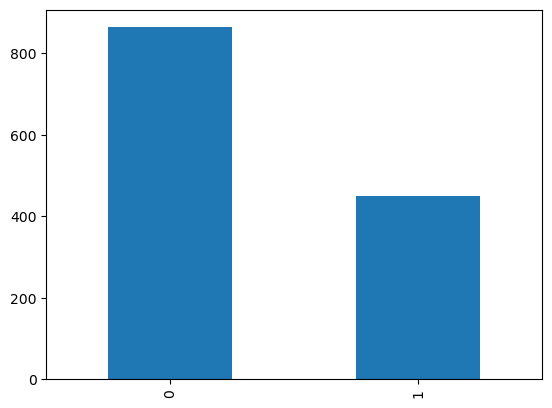

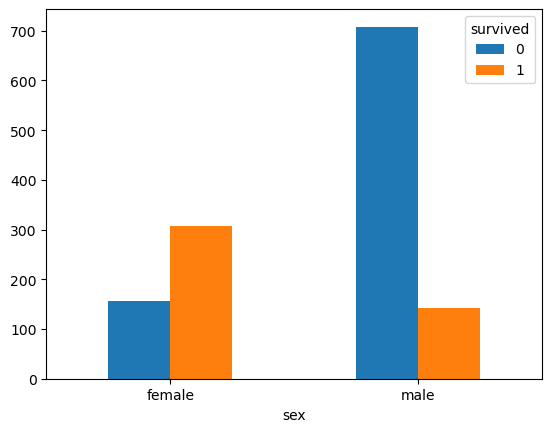

In [30]:
df_copy['survived'].value_counts().plot.bar()
pd.crosstab(df_copy['sex'], df_copy['survived']).plot.bar(rot=0);

<Figure size 200x200 with 0 Axes>

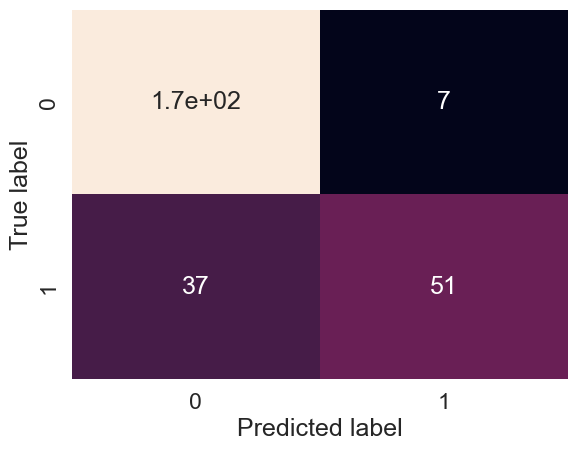

In [31]:
# Plot the confusion matrix
sns.set(font_scale=1.5)
plt.figure(figsize=(2,2))
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 cbar=False,
                 annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

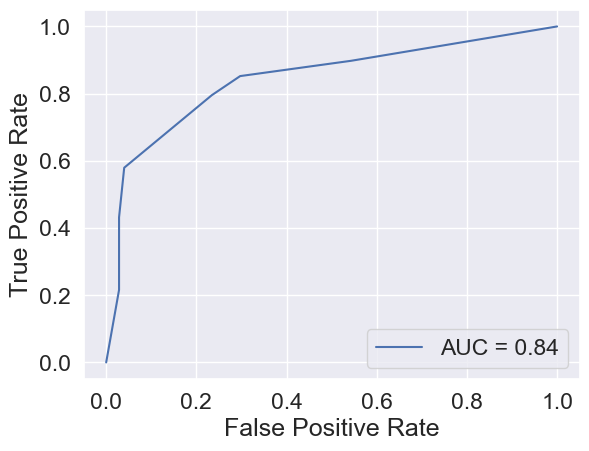

In [32]:
# Calculate the tpr, fpr and plot the ROC_AUC_CURVE
y_probs = clf.predict_proba(X_test) # Get predicted probabilities
y_probs_positive = y_probs[:, 1] # Get the positive probabilities 
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive) # Get fpr, tpr
roc_auc = auc(fpr, tpr) # Calculate the roc_auc
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Plot the roc_auc_curve
display.plot();

In [33]:
# Make five times experiments and Ccalculate the mean value
seeds = np.random.randint(1, 101, size=(5,))
accuracy =[]
precision = []
recall = []
F1 = []
for seed in seeds:
    np.random.seed(seed=seed)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    Acc = clf.score(X_test, y_test)
    accuracy.append(Acc)
    precision.append(precision_score(y_test, Y_pred))
    recall.append(recall_score(y_test, Y_pred))
    F1.append(f1_score(y_test, Y_pred))

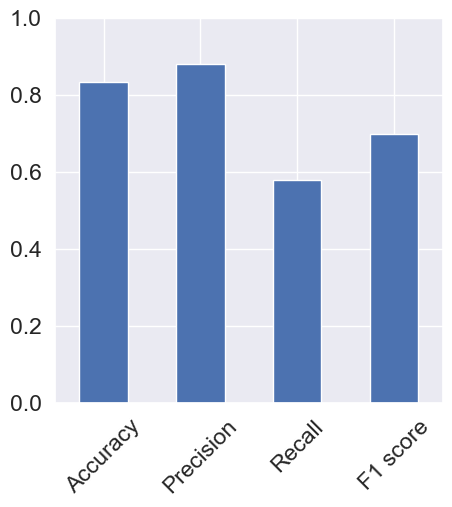

In [34]:
accuracy_avg = np.mean(accuracy)
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
F1_avg = np.mean(F1)

classification_df = pd.DataFrame({'Accuracy': accuracy_avg,
                                  'Precision': precision_avg,
                                  'Recall': recall_avg,
                                  'F1 score': F1_avg},
                                 index=['Classification Report'])
classification_df.T.plot.bar(rot=45, figsize=(5, 5), legend=False, ylim=[0, 1]);

### End